In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
plt.style.use('seaborn')

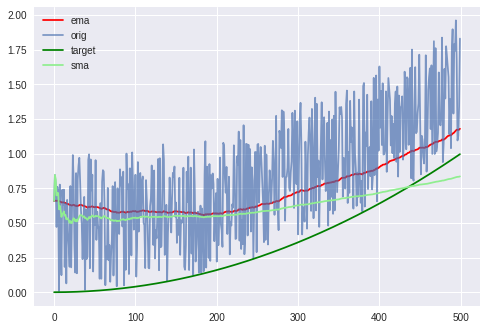

In [11]:
amount = 500
smooth = 0.01

rand_error = np.random.uniform(high=1, size=[amount])
x = np.arange(0, 1, 1 / amount) ** 2

new_x = x + rand_error

ema = []
sma = []
ema.append(new_x[0])
sma.append(new_x[0])

avg = 0

for i in range(amount - 1):
    ema.append(ema[-1] * (1 - smooth) + smooth * new_x[i + 1])
    avg += new_x[i + 1]
    sma.append(avg / (i + 1))

plt.plot(ema, color="red", label="ema")
plt.plot(new_x, alpha=0.7, label="orig")
plt.plot(x, color="green", label="target")
plt.plot(sma, color="lightgreen", label="sma")
plt.legend()
# plt.grid(alpha=0.7)


In [ ]:
difference = (CHEAPFEE + (n * PRICE_PER_ITEM) + SHIPPING_FEE) - (n * PRICE_PER_ITEM)
margin = difference / n

In [14]:
number = 11

y = [((150 + (n * 48) + 11.2) - (n * 48)) / n for n in range(1, number)]
# plt.figure()
# plt.plot([x for x in range(1, number)], y)
# plt.grid()
fig = px.line(x=[x for x in range(1, number)], y=y)
fig.update_layout(width=500, height=500)

In [31]:
unt = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
unt = -unt
fig = go.Figure(go.Surface(z=unt.values))
fig.update_layout(template='seaborn', width=600, height=600, margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [30]:
y[-1] + 48

64.12

In [2]:
data = pd.read_csv('data.csv')
data

,X1,X2,Y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242069,1
9,7.673756,3.508563,1


2.7810836
1.465489372
3.396561688
1.38807019
3.06407232
7.627531214
5.332441248
6.922596716
8.675418651
7.673756466


In [34]:
b0, b1, b2 = 0, 0, 0
n_epoch = 10
ALPHA = 0.3
arr_acc = []


def predict(x1, x2, b0, b1, b2):
    output = b0 + b1 * x1 + b2 * x2
    return 1.0 / (1 + np.exp(-output))


for epoch in range(n_epoch):
    for _, (x1, x2, y) in data.iterrows():
        probability = predict(x1, x2, b0, b1, b2)

        b0 = b0 + ALPHA * (y - probability) * probability * (1 - probability) * 1.0
        b1 = b1 + ALPHA * (y - probability) * probability * (1 - probability) * x1
        b2 = b2 + ALPHA * (y - probability) * probability * (1 - probability) * x2

    # rest the accuracy
    accuracy = 0
    for _, (x1, x2, y) in data.iterrows():
        probability = predict(x1, x2, b0, b1, b2)
        output_class = 1 if probability > 0.5 else 0
        accuracy += 1 if output_class == y else 0
        
    arr_acc.append(accuracy / len(data))

print('b0:', b0)
print('b1:', b1)
print('b2:', b2)

px.line(y=arr_acc, title='Accuracy')

b0: -0.4066054639903037
b1: 0.8525733163581036
b2: -1.1047462590413233
